**Databehandling 2025-10-29**

Setup dummy Dataframe
redundant? redundance - samma information i flera kolumner? 



***Saknade värden***  
- Viktigt att veta vad värdena betyder, kan de tas bort? eller ersättas med nåt? 
- Pandas behandla None,nun och NA nästan likadant 
- Datastorleken spelar roll - små dataset - måste vara mer försiktig med data, stora dataset - med få "nulls", kan antagligen ta bort hela rader. 
- kan vara en viktig datapunkt att datan saknas. Kan vara värdefull information som saknas. 
- titta på hur stor procent av värdena som saknas
- saknad data kan ha en negativ påverkan på datavisualisering, machinelearning algorithms, arithmetic computations


***Aggrigationer och Grupby***

In [ ]:
import numpy as np
import pandas as pd

n = 8
random_matrix = np.random.randint(1,10, (n, n)) #8*8 matrix with random integers
index = np.random.choice(random_matrix.size, 10, replace=False) 
print(f"index: {index}")
print(F"Flattened matrix: {random_matrix.ravel()}")

random_matrix = random_matrix*1.0 #convert to float matrix
random_matrix.ravel()[index] = None
print(random_matrix) # vad betyder det att ett värde inte finns med? NaN = Not a Number



In [ ]:
scores = pd.DataFrame(random_matrix, 
                    index=[f"player{i}" for i in range(1, n+1)],
                    columns=[f"player{i}" for i in range(1, n+1)])
print(scores)

In [ ]:
scores.isnull() # kolla vilka värden som är saknade 

In [ ]:
scores.dropna() # tar bort rader med saknade värden 

In [ ]:
scores.dropna(axis="columns") # tar bort kolumner med saknade värden

In [ ]:
scores.fillna(0)  # ersätter saknade värden med 0   

In [ ]:
# Kolla på titanic dataset
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.head()  

nulls = titanic.isnull().sum()
print(nulls)    

# Histogram över kön
sns.histplot(data=titanic, x="age", hue="sex", kde=True)    

median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median() 

print(f"Median male age: {median_male_age}")
print(f"Median female age: {median_female_age}")   

titanic.loc[(titanic["sex"] == "male", "age")] = titanic.loc[(titanic["sex"] == "male", "age")].fillna(median_male_age)
titanic.loc [(titanic["sex"] == "female", "age")] = titanic.loc[(titanic["sex"] == "female", "age")].fillna(median_female_age)

titanic.loc[titanic["age"]==29,"age"] = None # via loc kan man skriva komma och fortsätta direkt efteråt (maskningar) 

print(titanic.isnull().sum().loc["age"])


In [ ]:
print(titanic.isnull().sum().loc["age"])
titanic.loc[titanic["age"].isnull(), "sex"].value_counts()


**Databehandling 2025-10-28**

**L0-pandas-basics**.ipynb (raphaels github) 

.loc    # 
.iloc   # 

- Slicing dataframes
- Masking - skicka in en array med en mask i, välja ut/byta ut värden. 
- Read excel data # df.info() # df["foodcategory"].uniqe() 
- Data cleaning 
- Sortera data # .sort_values() # ascending=false (från störst till lägst) # top 5 median - .groupby, .median, .sort_values, ascending=False, .head()
- 

In [ ]:

import sys, pandas as pd, numpy as np
print(sys.executable)
print(pd.__version__, np.__version__)
pd.DataFrame({"a":[1,2], "b":[3,4]})



In [ ]:
import pandas as pd

data = dict(AI = 25, NET = 30,  APP = 30) 

series_programs = pd.Series(data=data) 

#extract values (behandla som en lista även om det är en dict)
print(f"series_programs[0] -> {series_programs[0]}")
print(f"series_programs[0] -> {series_programs[-1]}")

# get keys
print(f"series_programs.keys[0] -> {series_programs.keys()}") 
print(f"series_programs.keys[0] -> {series_programs.keys()[2]}") 

***Aggregations and groupby***  
(mixa inte ihop agg() med aggregate() )

Aggregations:  (variabler som vi tittar på för att lära oss nåt om systemet. genom att kombinera variablerna kan vi räkna ut nya variabler. exempelvi acceleration på en boll - hastighet och motstånd..)
sum(), mean(), median(), min(), max())



In [ ]:
survivors = titanic.groupby("sex").mean(numeric_only=True)[["survived", "age"]] #numeric_only föra att ara plocka kolumner som har siffror i
for i in survivors.index:
    survived_percentage = survivors.loc[i, 'survived'] * 100
    print(f"Survival percentage for {i}: {survived_percentage:.1f}%")
    print(f"Mean age for {i}: {survivors.loc[i, 'age']:.1f} years")


Survival percentage for female: 74.2%
Mean age for female: 27.7 years
Survival percentage for male: 18.9%
Mean age for male: 30.8 years


In [25]:
titanic.groupby("class")[["age", "fare"]].max()

C:\Users\fanny\AppData\Local\Temp\ipykernel_28140\55204569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("class")[["age", "fare"]].max()


,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


In [28]:
titanic.agg({"age": ["mean", "min", "max"], "fare": ["mean", "min", "max"]})


,age,fare
mean,29.526332,32.204208
min,0.420000,0.000000
max,80.000000,512.329200


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Survival count in titanic vs class')]

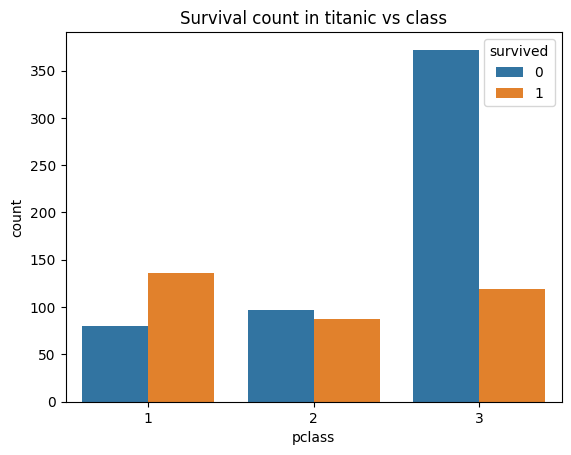

In [27]:
survived_class = titanic.groupby(["survived", "pclass"]).count()
survived_class = survived_class.reset_index()
ax = sns.barplot(data=survived_class, x="pclass", y="who", hue="survived")  # who = antal personer, hue = överlevde eller inte  
ax.set(ylabel="count", title="Survival count in titanic vs class")

In [ ]:
import random as rnd
rnd.seed(42)

# create Series using list
dice_series = pd.Series([rnd.randint(1,6) for _ in range(5)])
print(dice_series)

print(f"Min value: {dice_series.min()}")
print(f"Mean value: {dice_series.mean()}") #deskriptiva statistics
print(f"Median value: {dice_series.median()}") #deskriptiva statistics

In [ ]:
# Slicing DataFrames
df_programs = pd.DataFrame({
    "Language": ["Python", "Java", "C#", "JavaScript", "Ruby"],
    "Students": [150, 120, 100, 130, 80]
})  

print (df_programs)
